In [60]:
%matplotlib inline
#import matplotlib
#matplotlib.use('tkAgg')
import numpy as np
import matplotlib.pyplot as plt
import potentials
from opinions import OpinionModel
from neighbors import totally_connected
from neighbors import degree_connected #Working on name...

In [61]:
nsteps=500
nagents=20
P = []
for i in range(nagents):
    arr = []
    for j in range(nagents):
        #No rhyme or reason behind these choices, but they make cool graphs.
        arr.append(np.random.choice([.5, 1,-1]) * np.random.rand())
    P.append(arr)
neighbors = totally_connected(nagents, True)
#neighbors = degree_connected(nagents, 1)
opinions = [[np.random.rand(), np.random.rand()] for i in range(nagents)]
potentials = [potentials.degroot(P) for i in range(nagents)]
model = OpinionModel(nagents, neighbors, opinions, potentials)

In [62]:
model.ALPHA = .01
model.run(nsteps)

In [63]:
agent_opinion = model.datacollector.get_agent_vars_dataframe()

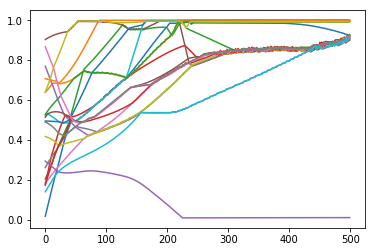

In [64]:
x=agent_opinion.Opinion0.as_matrix().reshape((nsteps, nagents))
plt.plot(x)

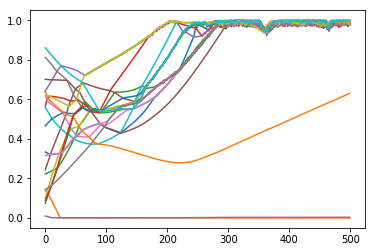

In [65]:
y=agent_opinion.Opinion1.as_matrix().reshape((nsteps, nagents))
plt.plot(y)